## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)
1. Create a `data` folder in your local project repository.  
2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.
3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
5. How many rows and columns are in `gdp_df`? What are the data types of each column?
6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?
10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
11. Which country was the first to have a GDP per capita greater than $100,000?
12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
16. Look at the number of observations in this dataset per year. What do you notice?
17. What is the first year to have a non-zero internet users percentage value?
18. How does the distribution of internet users percent differ for 2000 and 2014?
19. For how many countries was the percentage of internet users below 5% in 2014?
20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in gdp_df? What are the data types of each column?

In [4]:
gdp_df.shape

(7662, 4)

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

7662 rows, 4 columns, {object, int, float, float}

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [7]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
pd.options.display.max_rows = 250
gdp_df['Country'].value_counts()

Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (IDA & IBRD)               33
Middle income                                         33
Mongolia                                              33
Morocco                                               33
Mozambique                                            33
Myanmar                                               33
Namibia                                               33
Nepal                                                 33
Netherlands                                           33
New Zealand                                           33
Nicaragua                                             33
Niger                                                 33
Nigeria                                               33
North America                                         33
North Macedonia                                       33
Norway                         

In [9]:
gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Year, dtype: int64

In [10]:
pd.options.display.max_rows = 15
gdp_df.loc[gdp_df['Country'] == 'Somalia']

,Country,Year,GDP_Per_Capita
6271,Somalia,2022,1155.275773
6272,Somalia,2021,1136.735989
6273,Somalia,2020,1127.418534
6274,Somalia,2019,1138.285937
6275,Somalia,2018,1098.492832
6276,Somalia,2017,1059.143932
6277,Somalia,2016,1076.198333
6278,Somalia,2015,1029.699218
6279,Somalia,2014,925.577067
6280,Somalia,2013,889.166677


A lot of countries have missed a lot of earlier years in the data set, likely due to being somewhat new countries (i.e. Djibouti).  However, the countries were around before the data set started, so it was likely due to a lack of the country's documentation.  2022 also likely didn't have every country's data at the point of the data being distributed.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

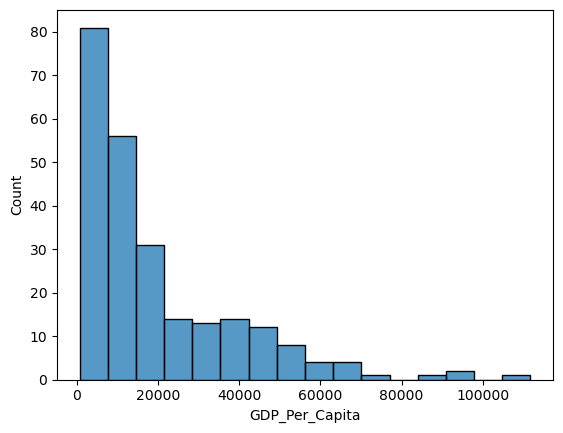

In [19]:
data=gdp_df.loc[gdp_df['Year'] == 2020]
sns.histplot(data["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

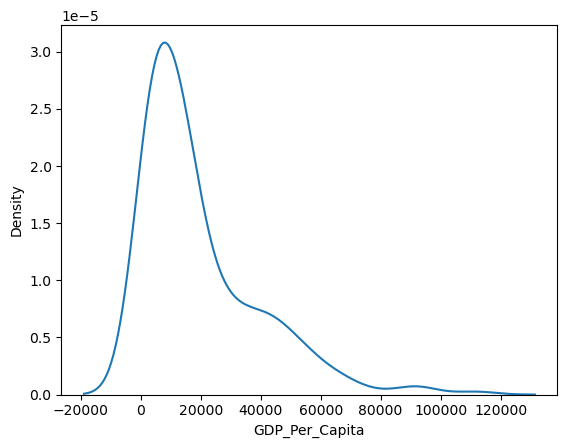

In [20]:
sns.kdeplot(data["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

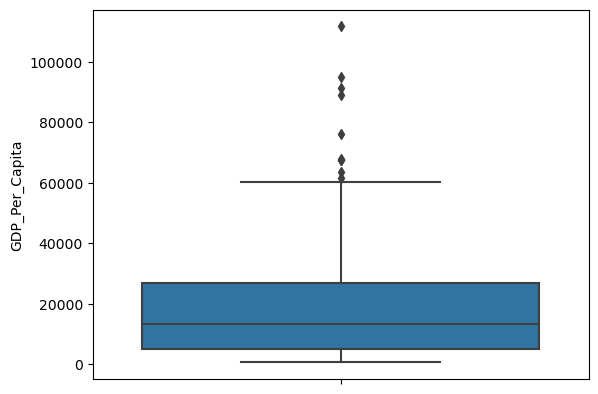

In [23]:
sns.boxplot(y=data["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

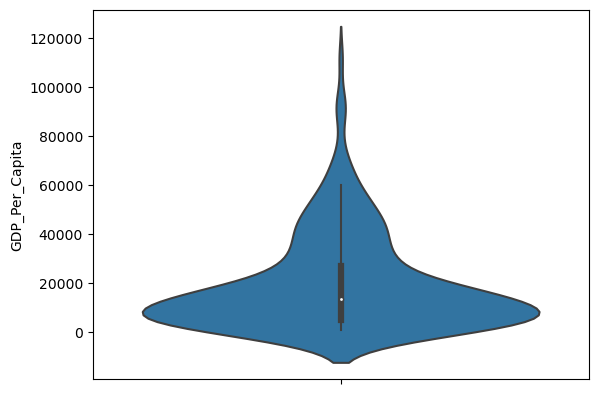

In [24]:
sns.violinplot(y=data["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [12]:
gdp_df.groupby('Year')['GDP_Per_Capita'].mean()

Year
1990    12506.088374
1991    12498.814611
1992    12674.226587
1993    12734.335398
1994    12849.696532
            ...     
2018    20793.829730
2019    21057.505017
2020    19586.754446
2021    20711.570080
2022    21156.670869
Name: GDP_Per_Capita, Length: 33, dtype: float64

19586

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [44]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

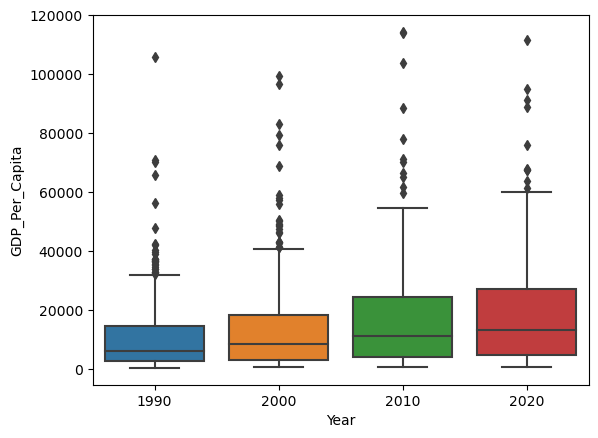

In [45]:
sns.boxplot(y=gdp_decades["GDP_Per_Capita"], x=gdp_decades['Year'])

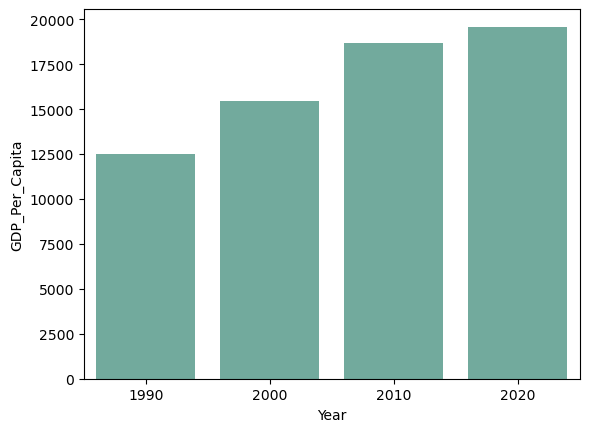

In [51]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades, estimator='mean', errorbar=None, color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

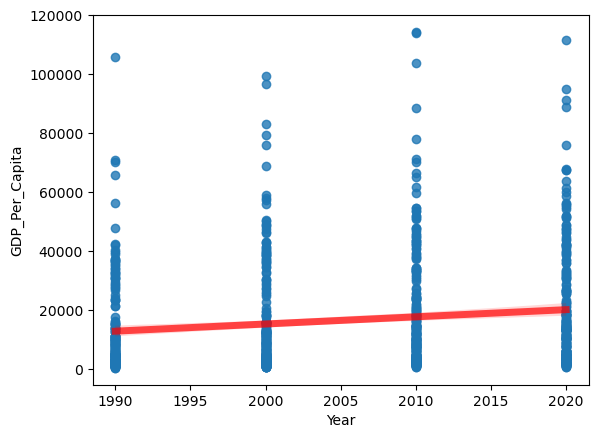

In [52]:
sns.regplot(x="Year", y="GDP_Per_Capita", data=gdp_decades, line_kws={"color":"r","alpha":0.7,"lw":5})

The boxplot and barplot work well to show specific things, but a scatterplot isn't a good idea for this, as you're trying to look at quantized points in time, and average is better shown by another plot (likely bar).

11. Which country was the first to have a GDP per capita greater than $100,000?

In [13]:
gdp_df.loc[gdp_df['GDP_Per_Capita'] >= 100000].sort_values(by='Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
...,...,...,...
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
6106,Singapore,2022,108036.110993


UAE in 1990, thought it hasn't kept it, and Luxembourg is the first one to maintain that level of GDP.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [14]:
gdp_df.loc[gdp_df['Year'] == 2020].sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


Luxembourg

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

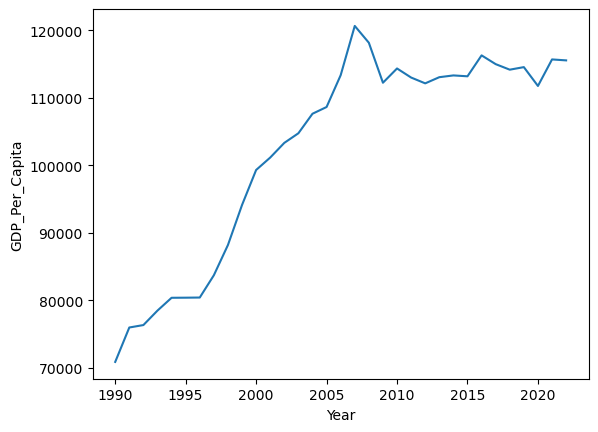

In [54]:
sns.lineplot(x="Year", y="GDP_Per_Capita", data=gdp_df.loc[gdp_df['Country'] == 'Luxembourg'])

Very unsuprising, 2008 and 2020 are generally low spots, coinciding with 2008 and 2020's economic troubles.

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

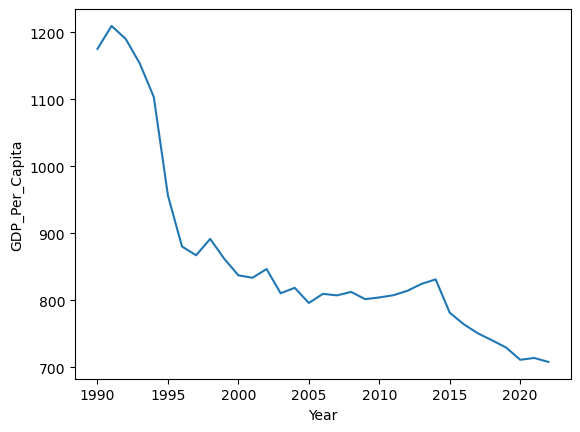

In [55]:
sns.lineplot(x="Year", y="GDP_Per_Capita", data=gdp_df.loc[gdp_df['Country'] == 'Burundi'])

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [70]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


All the errors come from footnotes that are generally fine, except for one row that messes with it.  I just looked at the csv to get which row to stop at.

15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [71]:
internet_df = internet_df.drop("Value Footnotes", axis=1)
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?


In [82]:
pd.options.display.max_rows = 250
internet_df['Year'].value_counts().sort_index()

1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Year, dtype: int64

Some have data up to 1960, but all of it is 0%.  1990 has every country as a baseline, then the number generally increases over time, but some years have countries missing.

17. What is the first year to have a non-zero internet users percentage value?

In [88]:
internet_df.loc[internet_df['Internet_Users_Pct'] > 0].sort_values(by = "Year")

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


1990

18. How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

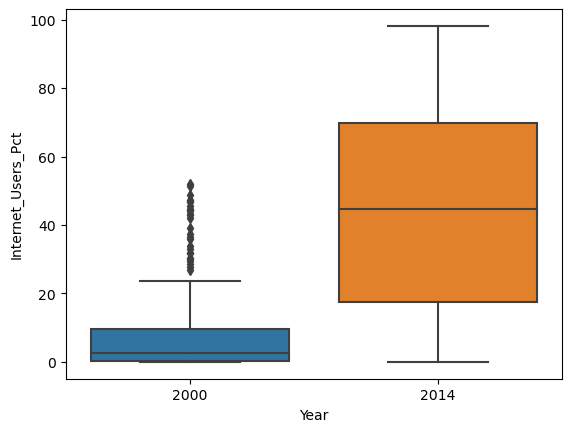

In [91]:
sns.boxplot(x= "Year", y = "Internet_Users_Pct", data = internet_df.loc[internet_df['Year'].isin([2000, 2014])])

19. For how many countries was the percentage of internet users below 5% in 2014?

In [94]:
internet_df.loc[(internet_df['Internet_Users_Pct'] < 5) & (internet_df['Year'] == 2014)].shape

(16, 3)

16

20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [96]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Year', 'Country'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2144.449634,6.390000
1,Afghanistan,2013,2165.340915,5.900000
2,Afghanistan,2012,2122.830759,5.454545
3,Afghanistan,2011,1961.096317,5.000000
4,Afghanistan,2010,2026.163818,4.000000
...,...,...,...,...
3416,Zimbabwe,1997,2896.147308,0.033080
3417,Zimbabwe,1996,2867.026043,0.016790
3418,Zimbabwe,1995,2641.378271,0.007684
3419,Zimbabwe,1994,2670.106615,0.001739


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [101]:
pd.options.display.max_rows = 10
gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014].sort_values(by = "Internet_Users_Pct")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3053,Timor-Leste,2014,3197.500120,1.14
540,Burundi,2014,831.294839,1.38
2806,Somalia,2014,925.577067,1.63
1236,Guinea,2014,2028.514781,1.72
2223,Niger,2014,1119.137212,1.95
...,...,...,...,...
1765,Luxembourg,2014,113313.578898,94.67
831,Denmark,2014,52048.335493,95.99
2263,Norway,2014,62838.515727,96.30
372,Bermuda,2014,77361.104881,96.80


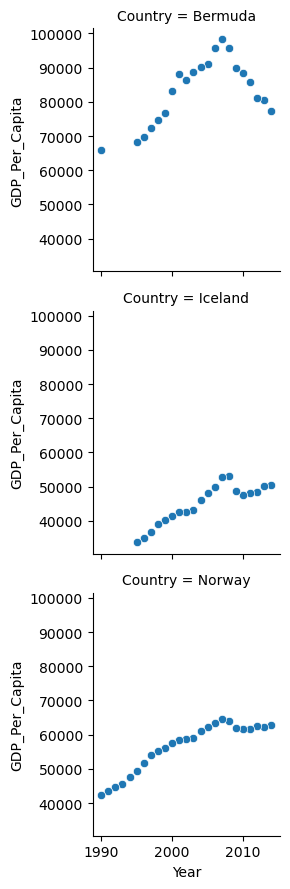

In [118]:
g = sns.FacetGrid(gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(["Norway","Bermuda", "Iceland"])], row="Country")
g.map(sns.scatterplot, "Year", "GDP_Per_Capita");

22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [103]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2144.449634,6.39
13,Albania,2014,11586.817446,60.10
34,Algeria,2014,11561.259795,18.09
56,Angola,2014,8183.164577,21.26
76,Antigua and Barbuda,2014,18779.139077,64.00
...,...,...,...,...
3316,Uzbekistan,2014,6075.192224,43.55
3337,Vanuatu,2014,2917.677875,18.80
3357,Viet Nam,2014,7641.909252,48.31
3377,Zambia,2014,3375.941270,17.34


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

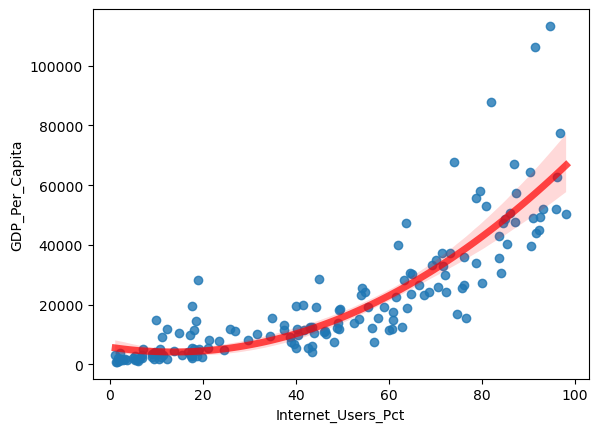

In [122]:
sns.regplot(x="Internet_Users_Pct", y="GDP_Per_Capita", data=gdp_and_internet_use_2014, order = 2, line_kws={"color":"r","alpha":0.7,"lw":5});

Not a ton of outliers, with a more quadratic fit, but the relationship kinda falls apart at 100% and close to 0% usage, as those are very obvious limits.